# Handwritten Digit Recognition Using a 2-Layer Neural Network

This project builds a **simple neural network** from scratch to recognize handwritten digits (0-9).  
Here’s a **step-by-step breakdown** of what happens, in plain language.

---

## 1. Preparing the Data
- Each image is a 28×28 grid of pixels (total 784 numbers).  
- We **flatten** each image into a single column of 784 numbers so the network can process it.  
- Pixel values range from 0–255. We **divide by 255** so all values are between 0 and 1. This makes learning faster and more stable.  
- Labels (the correct digit) are stored separately.  
- Training data is **shuffled** so the network doesn’t learn patterns from the order of the examples.  

---

## 2. Initializing the Network
- The network has **2 layers**:
  1. Hidden layer with 10 neurons  
  2. Output layer with 10 neurons (one for each digit)  
- **Weights (W1, W2)** are numbers that decide how strongly each input affects a neuron.  
- **Biases (b1, b2)** allow neurons to turn on even if the input is zero.  
- Both weights and biases are initialized randomly so that neurons start differently and can learn unique features.

---

## 3. Forward Propagation (Making Predictions)
- The input image goes through the network step by step:
  1. **Hidden layer**: Multiply input by weights, add bias → gives Z1.  
     - Apply **ReLU**: set negative numbers to 0 → gives A1.  
     - ReLU lets the network learn complex patterns.
  2. **Output layer**: Multiply hidden layer outputs by W2, add b2 → gives Z2.  
     - Apply **Softmax**: converts raw scores into probabilities → gives A2.  
     - Each neuron now has a probability for the image being that digit.  

---

## 4. Calculating Loss
- **Loss** measures how wrong the network is.  
- We use **cross-entropy loss**, which looks at the probability of the correct label.  
- Lower loss = better predictions.

---

## 5. Backward Propagation (Learning from Mistakes)
- The network calculates **gradients**: how much each weight and bias contributed to the error.  
- ReLU derivative is used to make sure only active neurons pass gradients backward.  
- Gradients tell the network which weights and biases to adjust and by how much.

---

## 6. Updating Parameters
- Use **gradient descent**:
  - Subtract (gradient × learning rate) from each weight and bias.  
  - This makes the network slightly better at predicting each step.  
- Repeat **forward → loss → backward → update** many times (iterations) until the network learns well.

---

## 7. Making Predictions
- After training, the network can predict digits:
  - Feed an image → forward propagation → output probabilities → choose the digit with the highest probability.  
- Can check predictions on individual images or the full dataset.

---

## 8. Evaluating Performance
- Compare predictions to true labels:
  - **Accuracy** = percentage of correct predictions.  
- Can visualize a few images with their predicted and true labels to see if the network is working as expected.

---

## Summary in Simple Terms
1. **Look at the image → turn pixels into numbers**  
2. **Mix numbers with weights and add biases → see which neurons “fire”**  
3. **Use hidden neurons to combine signals → produce output probabilities**  
4. **Check how wrong the prediction is (loss)**  
5. **Send error backwards → tweak weights and biases**  
6. **Repeat many times → network gets better**  
7. **Use the trained network to predict new images**  

This is how a neural network “learns” from data, step by step, even without using high-level deep learning libraries.


# Key Concepts and Definitions

Here are the main terms used in the neural network, explained in simple language:

---

## **Neuron**
- A single processing unit in the network.
- Takes input numbers, combines them, and decides whether to “fire” (send a signal) to the next layer.

---

## **Weights (W1, W2)**
- Numbers that control how important each input is for a neuron.
- Bigger weight → input has more influence; smaller weight → input has less influence.

---

## **Biases (b1, b2)**
- Extra numbers added to the weighted sum before activation.
- Allow a neuron to activate even if the input is zero.

---

## **Z1, Z2 (Linear Combinations)**
- The result of multiplying inputs by weights and adding biases.
- Raw values before activation functions.

---

## **Activation Function**
- A rule that decides the output of a neuron.
- Makes the network capable of learning complex, non-linear patterns.

### **ReLU (Rectified Linear Unit)**
- Activation function for the hidden layer.
- Sets negative numbers to 0 and keeps positive numbers as they are.
- Helps the network learn important features.

### **Softmax**
- Activation function for the output layer.
- Turns raw scores into probabilities.
- Each output neuron represents the probability that the input belongs to a certain class (0-9).
- All probabilities add up to 1.

---

## **Forward Propagation**
- Process of passing input through the network to get predictions.
- Input → weighted sum → activation → output probabilities.

---

## **Loss**
- A number that tells us how wrong the network is.
- Lower loss = better predictions.
- We use **cross-entropy loss**, which looks at the probability assigned to the correct label.

---

## **Backward Propagation**
- Process of sending the error back through the network.
- Calculates how much each weight and bias contributed to the error.
- Helps the network learn by adjusting weights and biases.

---

## **Gradient**
- Tells us **how much to change a weight or bias** to make predictions better.
- Calculated during backward propagation.

---

## **Gradient Descent**
- A method to **update weights and biases** using gradients.
- Learning rate controls **how big each update step is**.
- Repeat many times until the network learns well.

---

## **Prediction**
- After forward propagation, choose the class (digit) with the **highest probability** as the network’s answer.

---

## **Accuracy**
- Percentage of predictions that match the true labels.
- Measures how well the network is performing.


In [19]:
#Importing Libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [20]:
# Splitting data to train and test
data_train = pd.read_csv("./data/mnist_train.csv",header=None)
data_test = pd.read_csv("./data/mnist_test.csv",header=None)

In [3]:
data_train.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data_test.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
# Convert training and testing data into NumPy arrays
# This makes the data easier and faster to work with
train_data = np.array(data_train)
test_data = np.array(data_test)

# Shuffle the training data randomly
# This helps prevent the model from learning patterns based on data order
np.random.shuffle(train_data)

# Separate labels and features for training data
# The first column contains the labels (Y)
# The remaining columns contain pixel values (X)
Y_train = train_data[:, 0]
X_train = train_data[:, 1:].T / 255  # Transpose and normalize pixel values

# Separate labels and features for development (test) data
Y_dev = test_data[:, 0]
X_dev = test_data[:, 1:].T / 255  # Transpose and normalize pixel values

First, we convert our training and testing data into NumPy arrays so that we can perform mathematical operations on them efficiently. NumPy is much faster and more convenient for handling large datasets like images. 

Next, we shuffle the training data. This is important because it ensures that the model does not learn based on the order of the data, which could cause biased or incorrect learning.

Then, we split the data into labels and features. The labels (Y_train and Y_dev) are stored in the first column and represent the correct answers (for example, the digit in a digit-recognition dataset). The features (X_train and X_dev) are the pixel values of the images.

Finally, we normalize the pixel values by dividing by 255 so that all values are between 0 and 1. This makes training the model more stable and efficient. We also transpose the feature matrix so that each column represents one training example, which is the format many neural networks expect.

In [6]:
print(X_train.shape, Y_train.shape)
print(X_dev.shape, Y_dev.shape)

(784, 60000) (60000,)
(784, 10000) (10000,)


In [7]:
## 
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10,1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z,0)

def softmax(Z):
    expZ = np.exp(Z - np.max(Z, axis=0, keepdims=True))
    return expZ / np.sum(expZ, axis=0, keepdims=True)


def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y


def backward_prop(Z1, A1, Z2, A2, W2, X, Y):
    m = Y.size
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1, axis=1, keepdims=True)
    return dW1, db1, dW2, db2


def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 -= alpha * dW1
    b1 -= alpha * db1
    W2 -= alpha * dW2
    b2 -= alpha * db2
    return W1, b1, W2, b2

# Neural Network Helper Functions – Explanation

This section defines all the components used to build and train a simple **2-layer neural network** for image classification (for example, handwritten digits).

### Network Structure
1. **Input layer:** 784 neurons (28 × 28 pixel images)
2. **Hidden layer:** 10 neurons (ReLU activation)
3. **Output layer:** 10 neurons (Softmax activation)

---

## X (Input Data)
1. Represents the input images.
2. Each image is converted into **784 numbers** (28 × 28 pixels).
3. Shape: **(784, number_of_examples)**.
4. These values are the pixel intensities used by the model to make predictions.

---

## Y (Labels)
1. Contains the correct answers for each image.
2. Each value represents a digit from **0 to 9**.
3. Used to measure how accurate the model’s predictions are.

---

## W1 (Weights of First Layer)
1. Connects the input layer to the hidden layer.
2. Shape: **(10, 784)**.
3. Each weight represents the importance of a specific pixel for a hidden neuron.
4. Helps the model learn basic patterns like edges and shapes.

---

## b1 (Bias of First Layer)
1. Added to the weighted sum before applying the activation function.
2. Shape: **(10, 1)**.
3. Allows neurons to activate even when input values are small.
4. Helps shift the activation function for better learning.

---

## Z1 (Linear Combination – First Layer)
1. Result of multiplying input data by `W1` and adding `b1`.
2. Represents raw values before applying the activation function.
3. Shape: **(10, number_of_examples)**.

---

## A1 (Activation of Hidden Layer)
1. Output after applying the **ReLU** activation function to `Z1`.
2. Sets negative values to zero and keeps positive values.
3. Introduces non-linearity, allowing the network to learn complex patterns.
4. Shape: **(10, number_of_examples)**.

---

## W2 (Weights of Second Layer)
1. Connects the hidden layer to the output layer.
2. Shape: **(10, 10)**.
3. Controls how much each hidden neuron influences the final output.

---

## b2 (Bias of Second Layer)
1. Added to the weighted sum before applying the softmax function.
2. Shape: **(10, 1)**.
3. Helps adjust the final output values.

---

## Z2 (Linear Combination – Output Layer)
1. Result of multiplying `A1` by `W2` and adding `b2`.
2. Represents raw scores for each class (digits 0–9).
3. Shape: **(10, number_of_examples)**.

---

## A2 (Final Output / Predictions)
1. Output after applying the **softmax** function to `Z2`.
2. Converts raw scores into probabilities.
3. Each column sums to **1**.
4. The index with the highest probability is the predicted digit.

---

## one_hot_Y (One-Hot Encoded Labels)
1. Converts labels into binary vectors.
2. Used to compare predictions with the true labels.
3. Makes loss and gradient calculations easier.

---

## dW1, db1, dW2, db2 (Gradients)
1. Represent how much each weight and bias affects the model’s error.
2. Computed during backpropagation.
3. Used to update parameters and improve model performance.

---

## α (Learning Rate)
1. Controls how much the weights and biases are updated each step.
2. Small values lead to slow learning.
3. Large values may cause unstable learning.

---

## m (Number of Training Examples)
1. Represents the total number of samples in the dataset.
2. Used to average gradients for stable parameter updates.


In [8]:
def get_predictions(A2):
    return np.argmax(A2, axis=0)


def get_accuracy(predictions, Y):
    return np.mean(predictions == Y)

def compute_loss(A2, Y):
    m = Y.size
    log_probs = -np.log(A2[Y, np.arange(m)] + 1e-8)
    return np.sum(log_probs) / m


def gradient_descent(X, Y, iterations, alpha):
    W1, b1, W2, b2 = init_params()

    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W2, X, Y)
        W1, b1, W2, b2 = update_params(
            W1, b1, W2, b2, dW1, db1, dW2, db2, alpha
        )

        if i % 10 == 0:
            predictions = get_predictions(A2)
            acc = get_accuracy(predictions, Y)
            loss = compute_loss(A2, Y)
            print(f"Iter {i:4d} | Loss: {loss:.4f} | Acc: {acc:.4f}")

    return W1, b1, W2, b2


# Training and Evaluation Functions – Explanation

This section defines helper functions used to **evaluate predictions**, **measure model performance**, **compute loss**, and **train the neural network using gradient descent**.

---

## get_predictions(A2)
1. Converts the output probabilities into predicted class labels.
2. Selects the index with the highest probability for each example.
3. Uses `argmax` along axis 0.
4. Output shape: **(number_of_examples, )**.

---

## predictions
1. Stores the predicted class labels.
2. Each value is a digit from **0 to 9**.
3. Used to evaluate model accuracy.

---

## get_accuracy(predictions, Y)
1. Compares predicted labels with the true labels.
2. Counts how many predictions are correct.
3. Returns the average accuracy as a value between **0 and 1**.
4. Used to track how well the model is performing.

---

## compute_loss(A2, Y)
1. Calculates the **cross-entropy loss**.
2. Measures how far the predicted probabilities are from the true labels.
3. Uses only the probability of the correct class for each example.
4. A small value (1e-8) is added to avoid taking the log of zero.
5. Lower loss means better model performance.

---

## loss
1. Represents the average error of the model.
2. Used to monitor learning progress during training.
3. Should decrease as training continues.

---

## gradient_descent(X, Y, iterations, alpha)
1. Trains the neural network using **gradient descent**.
2. Repeatedly updates weights and biases to reduce loss.
3. Returns the trained parameters.

---

## iterations
1. Number of times the training loop runs.
2. More iterations allow the model to learn better.
3. Too many iterations may cause overfitting.

---

## alpha (Learning Rate)
1. Controls how much parameters are updated each step.
2. Small values lead to slow learning.
3. Large values may cause unstable training.

---

## Training Loop (Inside Gradient Descent)
1. Initializes weights and biases.
2. Performs **forward propagation** to get predictions.
3. Uses **backward propagation** to compute gradients.
4. Updates parameters using gradient descent.
5. Repeats this process for the given number of iterations.

---

## Printing Progress
1. Every 10 iterations, the model prints:
   - Current iteration number
   - Loss value
   - Accuracy value
2. Helps monitor training performance over time.

---

## Returned Values
1. `W1, b1, W2, b2` are returned after training.
2. These represent the learned parameters of the model.
3. Used later for making predictions on new data.


In [22]:
# Train the neural network using gradient descent
# X_train and Y_train are the training data and labels
# 2000 is the number of training iterations
# 0.1 is the learning rate that controls how much the weights are updated each step
# The function returns the learned weights and biases after training
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 2000, 0.1)

Iter    0 | Loss: 3.5637 | Acc: 0.0949
Iter   10 | Loss: 2.2190 | Acc: 0.1860
Iter   20 | Loss: 2.0569 | Acc: 0.2580
Iter   30 | Loss: 1.9365 | Acc: 0.3013
Iter   40 | Loss: 1.8214 | Acc: 0.3424
Iter   50 | Loss: 1.7110 | Acc: 0.3841
Iter   60 | Loss: 1.6081 | Acc: 0.4225
Iter   70 | Loss: 1.5144 | Acc: 0.4604
Iter   80 | Loss: 1.4276 | Acc: 0.4971
Iter   90 | Loss: 1.3456 | Acc: 0.5323
Iter  100 | Loss: 1.2675 | Acc: 0.5643
Iter  110 | Loss: 1.1950 | Acc: 0.5930
Iter  120 | Loss: 1.1301 | Acc: 0.6182
Iter  130 | Loss: 1.0733 | Acc: 0.6397
Iter  140 | Loss: 1.0240 | Acc: 0.6574
Iter  150 | Loss: 0.9813 | Acc: 0.6722
Iter  160 | Loss: 0.9441 | Acc: 0.6848
Iter  170 | Loss: 0.9114 | Acc: 0.6970
Iter  180 | Loss: 0.8822 | Acc: 0.7076
Iter  190 | Loss: 0.8558 | Acc: 0.7182
Iter  200 | Loss: 0.8317 | Acc: 0.7272
Iter  210 | Loss: 0.8095 | Acc: 0.7363
Iter  220 | Loss: 0.7887 | Acc: 0.7443
Iter  230 | Loss: 0.7693 | Acc: 0.7528
Iter  240 | Loss: 0.7510 | Acc: 0.7595
Iter  250 | Loss: 0.7338 

In [23]:
def make_predictions(X, W1, b1, W2, b2):
    # Perform forward propagation using the trained weights and biases
    # This computes the final output probabilities (A2)
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    
    # Convert the output probabilities into predicted class labels
    # The class with the highest probability is chosen as the prediction
    predictions = get_predictions(A2)
    
    # Return the predicted labels
    return predictions

In [11]:
def test_prediction(index, W1, b1, W2, b2, X, Y):
    # Select a single image from the dataset using the given index
    # The image is kept as a column vector to match the network input shape
    current_image = X[:, index, None]

    # Make a prediction for the selected image using the trained model
    prediction = make_predictions(current_image, W1, b1, W2, b2)

    # Extract the predicted label and convert it to an integer
    pred_label = int(prediction[0])
    
    # Get the true label for comparison
    true_label = int(Y[index])

    # Print the predicted label and the true label
    print("Prediction:", pred_label)
    print("Label:", true_label)

    # Reshape the image back to 28x28 format for visualization
    # Multiply by 255 to restore original pixel values
    image_display = current_image.reshape(28, 28) * 255

    # Display the image in grayscale
    plt.imshow(image_display, cmap="gray")
    plt.axis("off")
    plt.show()

Prediction: 7
Label: 7


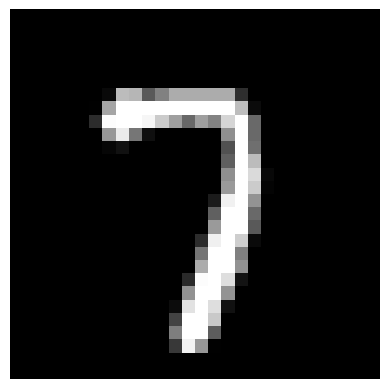

Prediction: 7
Label: 7


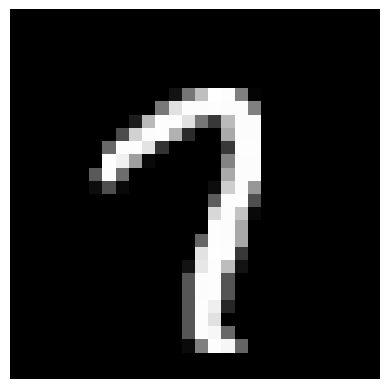

Prediction: 6
Label: 6


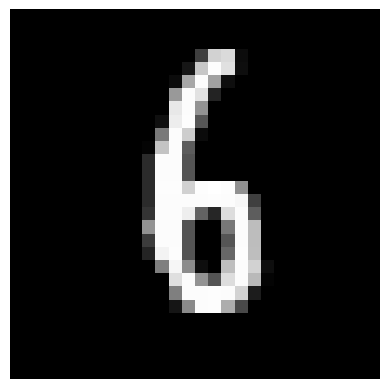

Prediction: 7
Label: 7


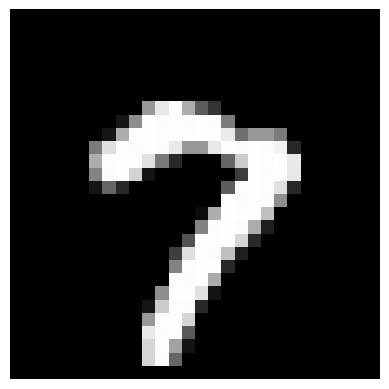

Prediction: 8
Label: 8


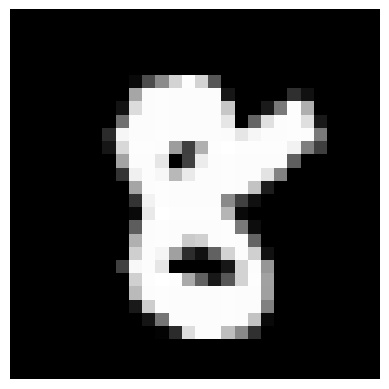

In [12]:
# Loop through the first 5 training examples
# For each example, display the image and show the model's prediction
# This helps visually check how well the model is performing on training data
for i in range(5):
    test_prediction(i, W1, b1, W2, b2, X_train, Y_train)

# Evaluating the Model on Development Data

## Making Predictions on Dev Set
- Use the trained model (W1, b1, W2, b2) to predict labels for all development examples (X_dev).  
- The predicted labels are stored in `dev_predictions`.  
- Calculate the accuracy by comparing predictions with the true labels (Y_dev) using `get_accuracy`.  
- Print the overall development set accuracy to see how well the model performs on unseen data.

---

## Visualizing Single Dev Examples
- The function `show_dev_prediction` allows us to inspect individual predictions visually.  
- Steps:
  1. Extract a single image from the development set using the given index.  
  2. Make a prediction using the trained model.  
  3. Print both the predicted label and the true label.  
  4. Display the image in grayscale to see what the model is predicting.

---

## Sample Predictions from Dev Set
- Display predictions for a few selected examples from the development set.  
- Helps check how well the model generalizes to data it has not seen during training.  
- Examples include indices 0, 12, and 57, showing both the predicted label and the true label along with the corresponding image.


In [25]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
dev_acc = get_accuracy(dev_predictions, Y_dev)
print("Dev accuracy:", dev_acc)

def show_dev_prediction(index, W1, b1, W2, b2, X_dev, Y_dev):
    image = X_dev[:, index, None]
    prediction = make_predictions(image, W1, b1, W2, b2)[0]
    label = Y_dev[index]

    print(f"Prediction: {prediction}")
    print(f"Label: {label}")

    plt.imshow(image.reshape(28, 28), cmap="gray")
    plt.axis("off")
    plt.show()

Dev accuracy: 0.9085


Prediction: 7
Label: 7


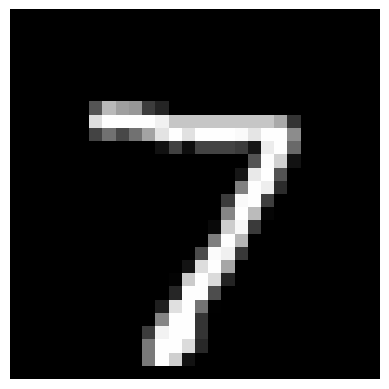

Prediction: 9
Label: 9


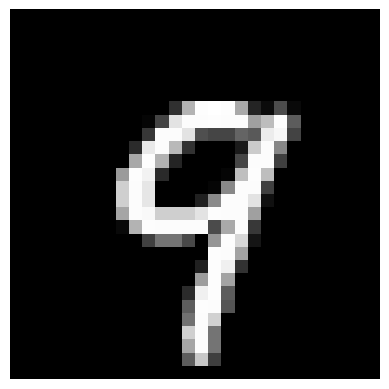

Prediction: 1
Label: 1


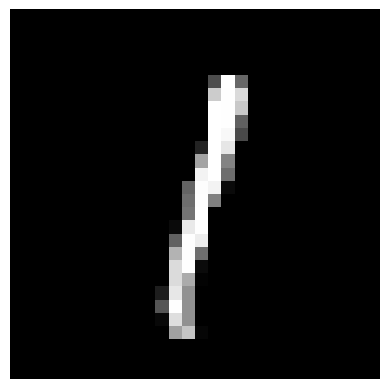

In [26]:
show_dev_prediction(0, W1, b1, W2, b2, X_dev, Y_dev)
show_dev_prediction(12, W1, b1, W2, b2, X_dev, Y_dev)
show_dev_prediction(57, W1, b1, W2, b2, X_dev, Y_dev)